# Домашнее задание к уроку №8

# Тема “Обучение без учителя”

# Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [138]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [139]:
from sklearn.datasets import load_boston

boston = load_boston()

c:\users\79263\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

In [140]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [143]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler()

In [145]:
X_train_scaled = scaler.fit_transform(X_train)

In [146]:
X_test_scaled = scaler.transform(X_test)

In [147]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)


In [148]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [149]:
tsne = TSNE(n_components=2,learning_rate=250,random_state=42)

In [150]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

c:\users\79263\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [151]:
X_train_tsne

array([[ 1.81041489e+01,  2.91841412e+01],
       [ 3.36446118e+00, -7.90966845e+00],
       [-2.07167511e+01, -8.94725513e+00],
       [ 2.76545868e+01,  2.66364594e+01],
       [ 4.35941935e+00, -7.43922949e+00],
       [-1.18708668e+01, -3.19696522e+00],
       [-9.88421822e+00, -3.11915612e+00],
       [-2.67814331e+01, -1.50311155e+01],
       [ 2.85059834e+01,  2.74729290e+01],
       [ 2.97867966e+01,  2.44989853e+01],
       [-1.03291616e+01, -2.70374441e+00],
       [-6.06545353e+00, -9.15262985e+00],
       [-5.61790419e+00, -1.35841761e+01],
       [ 2.86210976e+01,  2.46200790e+01],
       [-7.11505461e+00, -1.45416355e+01],
       [ 7.49843025e+00, -8.60527611e+00],
       [ 1.22831607e+00, -5.80473423e+00],
       [-2.18536625e+01, -8.58939934e+00],
       [-1.68641014e+01, -1.03258257e+01],
       [-1.86876888e+01, -6.71250486e+00],
       [ 2.41089859e+01,  2.88961773e+01],
       [-7.64432192e-01, -5.37148428e+00],
       [-1.35651073e+01, -3.63450623e+00],
       [-8.

In [152]:
X_train_tsne.shape

(404, 2)

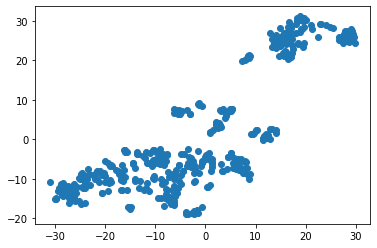

In [153]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

# Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [154]:
from sklearn.cluster import KMeans

In [155]:
kmeans = KMeans(n_clusters = 3,max_iter=100,random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

In [156]:
pd.value_counts(labels_train)

0    191
1    128
2     85
dtype: int64

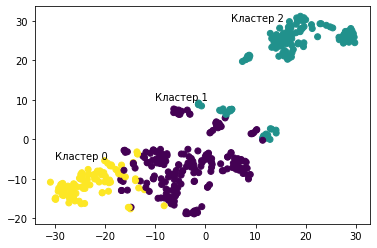

In [157]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = labels_train)
plt.text(-30,-5,'Кластер 0')
plt.text(-10,10,'Кластер 1')
plt.text(5,30,'Кластер 2')
plt.show()

In [158]:
y_train[labels_train==0].mean()

price    24.971204
dtype: float64

In [159]:
y_train[labels_train==1].mean()

price    16.179688
dtype: float64

In [160]:
y_train[labels_train==2].mean()

price    27.874118
dtype: float64

In [161]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.42098554973821994

In [162]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.7152190625

In [163]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.0721184705882353

# Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [164]:
#kmeans = KMeans(n_clusters = 3,max_iter=100,random_state=42)

labels_test =  kmeans.predict(X_test_scaled)

In [165]:
pd.value_counts(labels_train)

0    191
1    128
2     85
dtype: int64

In [166]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

c:\users\79263\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


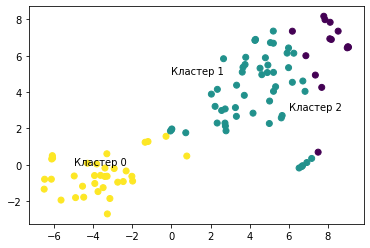

In [179]:
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c = labels_train_1)
plt.text(-5,0,'Кластер 0')
plt.text(0,5,'Кластер 1')
plt.text(6,3,'Кластер 2')
plt.show()

In [180]:
y_test[labels_test==0].mean()

price    21.860784
dtype: float64

In [181]:
y_test[labels_test==1].mean()

price    16.437143
dtype: float64

In [182]:
y_test[labels_test==2].mean()

price    31.35
dtype: float64

In [183]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.2660788235294118

In [184]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [185]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.06206